<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Final-Project-Submission" data-toc-modified-id="Final-Project-Submission-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Final Project Submission</a></span></li><li><span><a href="#Business-Understanding" data-toc-modified-id="Business-Understanding-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Business Understanding</a></span></li><li><span><a href="#Data-Understanding" data-toc-modified-id="Data-Understanding-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Understanding</a></span><ul class="toc-item"><li><span><a href="#Variable-description" data-toc-modified-id="Variable-description-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Variable description</a></span></li><li><span><a href="#Importing-and-Loading-Dataset" data-toc-modified-id="Importing-and-Loading-Dataset-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Importing and Loading Dataset</a></span></li></ul></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Preparation</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Checking-Data-Types" data-toc-modified-id="Checking-Data-Types-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Checking Data Types</a></span></li></ul></li><li><span><a href="#Investigating-Outliers" data-toc-modified-id="Investigating-Outliers-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Investigating Outliers</a></span></li></ul></li><li><span><a href="#Exploring-the-Data" data-toc-modified-id="Exploring-the-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exploring the Data</a></span><ul class="toc-item"><li><span><a href="#Investigate-linearity-assumption" data-toc-modified-id="Investigate-linearity-assumption-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Investigate linearity assumption</a></span></li><li><span><a href="#Interpret-a-Correlation-Heatmap-to-Build-a-Baseline-Model" data-toc-modified-id="Interpret-a-Correlation-Heatmap-to-Build-a-Baseline-Model-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Interpret a Correlation Heatmap to Build a Baseline Model</a></span></li><li><span><a href="#Normalize-Data" data-toc-modified-id="Normalize-Data-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Normalize Data</a></span></li></ul></li><li><span><a href="#Baseline-Model" data-toc-modified-id="Baseline-Model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Baseline Model</a></span></li><li><span><a href="#Model-2" data-toc-modified-id="Model-2-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model 2</a></span></li><li><span><a href="#Model-3" data-toc-modified-id="Model-3-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Model 3</a></span><ul class="toc-item"><li><span><a href="#Checking-Normality" data-toc-modified-id="Checking-Normality-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Checking Normality</a></span></li><li><span><a href="#Check-Homoscedasticity-Assumption" data-toc-modified-id="Check-Homoscedasticity-Assumption-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Check Homoscedasticity Assumption</a></span></li></ul></li><li><span><a href="#Making-Predictions" data-toc-modified-id="Making-Predictions-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Making Predictions</a></span><ul class="toc-item"><li><span><a href="#Preprocess-Test-Data" data-toc-modified-id="Preprocess-Test-Data-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Preprocess Test Data</a></span></li></ul></li></ul></div>

## Final Project Submission

* Student name: Alex Casey
* Student pace: DS Flex / 20 Week track
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL:


## Business Understanding

For this project, I used regression modeling to analyze house sales in a northwestern county. King County is located in the U.S. state of Washington. The population was 2,269,675 in the 2020 census, making it the most populous county in Washington, and the 12th-most populous in the United States. The county seat is Seattle, also the state's most populous city.

Not all home improvements are created equally, so how do you choose between remodeling your kitchen or adding wood floors? How much would adding a bedroom or bathroom actually increase your home value?

This project seeks to understand which house features have the greatest effect on sales price.

Finally, this model should be used by investors or home buyers in selecting potential investment properties based on key features that drive sales price.

## Data Understanding

This project uses the King County House Sales dataset, which can be found in kc_house_data.csv in the data folder in this repo.

### Variable description
Here are some brief explanations of the variables used in this project :



* **id** - unique identifier for a house
* **date** - house was sold
* **price** -  is prediction target
* **bedrooms** -  # of Bedrooms
* **bathrooms** -  # of bathrooms
* **sqft_living** -  footage of the home
* **sqft_lot** -  footage of the lot
* **floors** -  floors (levels) in house
* **waterfront** - house with waterfront view
* **view** - has been viewed (prior to being sold)
* **condition** - condition of house
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - year built
* **yr_renovated** - year when house was renovated
* **zipcode** - zipcode
* **lat** - latitude coordinate
* **long** - longitude coordinate
* **sqft_living15** - the square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - the square footage of the land lots of the nearest 15 neighbors
 

### Importing and Loading Dataset


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import mpl_toolkits
from sklearn.model_selection import train_test_split
from pandas_profiling import ProfileReport
import warnings
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import itertools as it
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("data/kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503



We will conduct data cleaning, exploration and feature engineering on the training set as well as build our prediction model using this subset.

In [3]:
#The prediction target for this analysis is the sale price of the home, so we separate the data into X and y accordingly:
y = data["price"]
X = data.drop("price", axis=1)

In [4]:
# Next, we separate the data into a train set and a test set prior to performing any preprocessing steps:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

# We always should have the same number of rows in X as values in y
assert X_train.shape[0] == y_train.shape[0]

X_train is a DataFrame with 16197 rows and 20 columns
y_train is a Series with 16197 values


In [6]:
# Set df as our training set, including features and target
df = pd.concat([X_train, y_train], axis = 1)

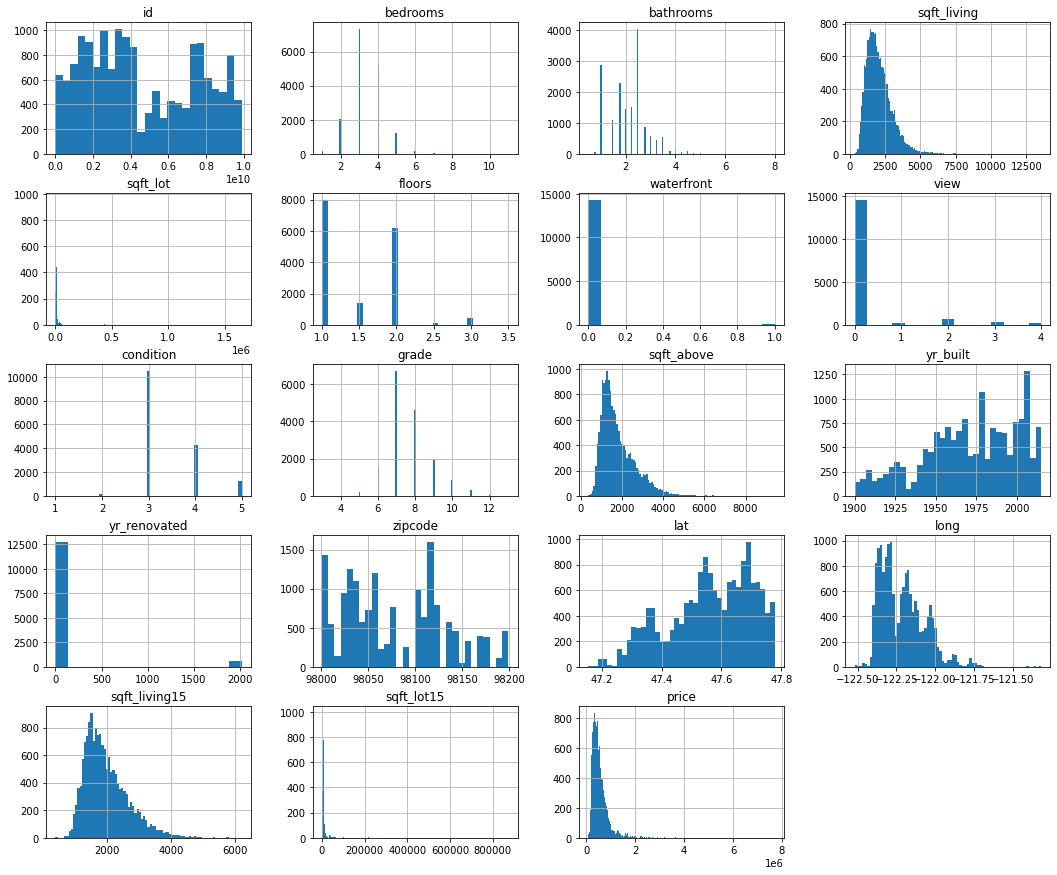

In [7]:
# Clearly we have categorical and continuous data
df.hist(figsize=(18,15), bins='auto');

In [8]:
# price, sqft_above, sqft_basement, sqft_living, sqft_lot are all continuous and appear to be log normally distributed.
# Most values are bunched towards the lower end while there are a few very large values
# We can see that there is an increase in the number of houses built as time goes on. Most houses sold were built in the 2000s

## Data Preparation
To start, you'll deal with the most obvious issue: data features with the wrong data encoding.

#### Checking Data Types
In the cell below, use the appropriate method to check the data type of each column.

In [9]:
#checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 6405 to 15795
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16197 non-null  int64  
 1   date           16197 non-null  object 
 2   bedrooms       16197 non-null  int64  
 3   bathrooms      16197 non-null  float64
 4   sqft_living    16197 non-null  int64  
 5   sqft_lot       16197 non-null  int64  
 6   floors         16197 non-null  float64
 7   waterfront     14441 non-null  float64
 8   view           16148 non-null  float64
 9   condition      16197 non-null  int64  
 10  grade          16197 non-null  int64  
 11  sqft_above     16197 non-null  int64  
 12  sqft_basement  16197 non-null  object 
 13  yr_built       16197 non-null  int64  
 14  yr_renovated   13318 non-null  float64
 15  zipcode        16197 non-null  int64  
 16  lat            16197 non-null  float64
 17  long           16197 non-null  float64
 18  sqf

In [10]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,19221.0,7.595859e-03,8.682485e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21534.0,2.338627e-01,7.656862e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


From description we can infer that

- Average price of house sold in King County is 540,088
- Max price of home sale is 7.7 million
- Avg no. of bedrooms in houses sold in KC is 3/House with 2 bathrooms /bedroom with one house is having 33 Bedrooms
- Avg area of house is 2079 Sqft with one house having 13540 Sqft. area

In [11]:
df.shape

(16197, 21)

In [12]:
df.isna().sum()

id                  0
date                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       1756
view               49
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     2879
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
price               0
dtype: int64

In [13]:
# waterfront value is null. Using logic, it probably means that the property is not a waterfront property
df.waterfront.unique()

array([ 0., nan,  1.])

In [14]:
# fill nan with 0 (not waterfront property)
df.waterfront.fillna(0,inplace=True)
df.isna().sum()

id                  0
date                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               49
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     2879
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
price               0
dtype: int64

In [15]:
# 0 denotes property has not been renovated
df.yr_renovated.value_counts()

0.0       12771
2014.0       49
2005.0       24
2013.0       23
2003.0       23
          ...  
1950.0        1
1954.0        1
1971.0        1
1978.0        1
1940.0        1
Name: yr_renovated, Length: 66, dtype: int64

In [16]:
# Let's fill in the missing values to reflect the fact that
# the houses haven't been renovated

df.yr_renovated.fillna(0,inplace=True)
df.isna().sum()

id                0
date              0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view             49
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
price             0
dtype: int64

In [17]:
#checking out the view column
df.view.unique()

array([ 0.,  3.,  2.,  4.,  1., nan])

In [18]:
# This looks like how many times the property was viewed before being sold

In [19]:
# Let's assume missing values mean the home wasn't viewed
df.view.fillna(0,inplace=True)

In [20]:
# Numerical Data Stored as Strings
# we need to change the data type of sqft_basement because it's a string when
# it needs to be converted to a float
df.dtypes

id                 int64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price            float64
dtype: object

In [21]:
# checking out the values to see if there are any symbols
# is the basement square footage really not known? Or is it a function of sqft_living?

df.sqft_basement.unique()

array(['0.0', '710.0', '760.0', '530.0', '600.0', '880.0', '960.0',
       '560.0', '1120.0', '300.0', '?', '650.0', '1040.0', '1020.0',
       '380.0', '610.0', '508.0', '110.0', '310.0', '1090.0', '510.0',
       '680.0', '230.0', '730.0', '580.0', '210.0', '1060.0', '540.0',
       '640.0', '800.0', '140.0', '1150.0', '1800.0', '910.0', '500.0',
       '740.0', '1400.0', '240.0', '550.0', '810.0', '1030.0', '420.0',
       '720.0', '1110.0', '440.0', '120.0', '220.0', '840.0', '750.0',
       '1852.0', '870.0', '330.0', '850.0', '1000.0', '770.0', '400.0',
       '370.0', '790.0', '630.0', '1660.0', '360.0', '820.0', '1870.0',
       '350.0', '940.0', '1320.0', '1010.0', '570.0', '780.0', '250.0',
       '950.0', '1300.0', '620.0', '480.0', '1200.0', '460.0', '2500.0',
       '1160.0', '920.0', '1390.0', '890.0', '980.0', '900.0', '1230.0',
       '320.0', '1580.0', '1190.0', '1050.0', '260.0', '430.0', '1500.0',
       '1270.0', '990.0', '2060.0', '1100.0', '290.0', '1080.0', '190.

In [22]:
# we can see that sqft_living = sqft_above + sqft_basement
df.loc[:,['sqft_living','sqft_above','sqft_basement']]

,sqft_living,sqft_above,sqft_basement
6405,1880,1880,0.0
937,2020,1310,710.0
19076,4720,3960,760.0
15201,1430,1430,0.0
13083,2270,1740,530.0
...,...,...,...
11964,2230,2230,0.0
21575,2770,2770,0.0
5390,1530,1530,0.0
860,380,380,0.0


In [23]:
# make a copy to drop "?" values to perform boolean comparison
test_df = df.copy()
test_df = test_df[test_df.sqft_basement != '?']
# needed a separate line of code for '0.0' as .astype(float) would error
test_df.sqft_basement[test_df.sqft_basement == '0.0'] = 0
# now I can convert datatype of the whole set to float
test_df.sqft_basement = test_df.sqft_basement.astype(float)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15857 entries, 6405 to 15795
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15857 non-null  int64  
 1   date           15857 non-null  object 
 2   bedrooms       15857 non-null  int64  
 3   bathrooms      15857 non-null  float64
 4   sqft_living    15857 non-null  int64  
 5   sqft_lot       15857 non-null  int64  
 6   floors         15857 non-null  float64
 7   waterfront     15857 non-null  float64
 8   view           15857 non-null  float64
 9   condition      15857 non-null  int64  
 10  grade          15857 non-null  int64  
 11  sqft_above     15857 non-null  int64  
 12  sqft_basement  15857 non-null  float64
 13  yr_built       15857 non-null  int64  
 14  yr_renovated   15857 non-null  float64
 15  zipcode        15857 non-null  int64  
 16  lat            15857 non-null  float64
 17  long           15857 non-null  float64
 18  sqf

Now let's see if this relationship between the 3 variables is consistent throughout the entire dataset

In [24]:
(test_df.sqft_basement != test_df.sqft_living - test_df.sqft_above).sum()

0


Thus we can conclude that any row with a value of '?' in the sqft_basement column can be replaced by adding the data from sqft_living and sqft_above.

In [25]:
difference = (df.loc[df["sqft_basement"] == '?', ["sqft_living"]
                   ]).values-(df.loc[df["sqft_basement"] == '?', ["sqft_above"]]).values
df.loc[df["sqft_basement"] == '?', ["sqft_basement"]] = difference

In [26]:
#change the dtype to int64 to be consistent with the rest of the 'sqft' variables
df.sqft_basement = df.sqft_basement.astype(float)
df.sqft_basement = df.sqft_basement.astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 6405 to 15795
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16197 non-null  int64  
 1   date           16197 non-null  object 
 2   bedrooms       16197 non-null  int64  
 3   bathrooms      16197 non-null  float64
 4   sqft_living    16197 non-null  int64  
 5   sqft_lot       16197 non-null  int64  
 6   floors         16197 non-null  float64
 7   waterfront     16197 non-null  float64
 8   view           16197 non-null  float64
 9   condition      16197 non-null  int64  
 10  grade          16197 non-null  int64  
 11  sqft_above     16197 non-null  int64  
 12  sqft_basement  16197 non-null  int64  
 13  yr_built       16197 non-null  int64  
 14  yr_renovated   16197 non-null  float64
 15  zipcode        16197 non-null  int64  
 16  lat            16197 non-null  float64
 17  long           16197 non-null  float64
 18  sqf

### Investigating Outliers

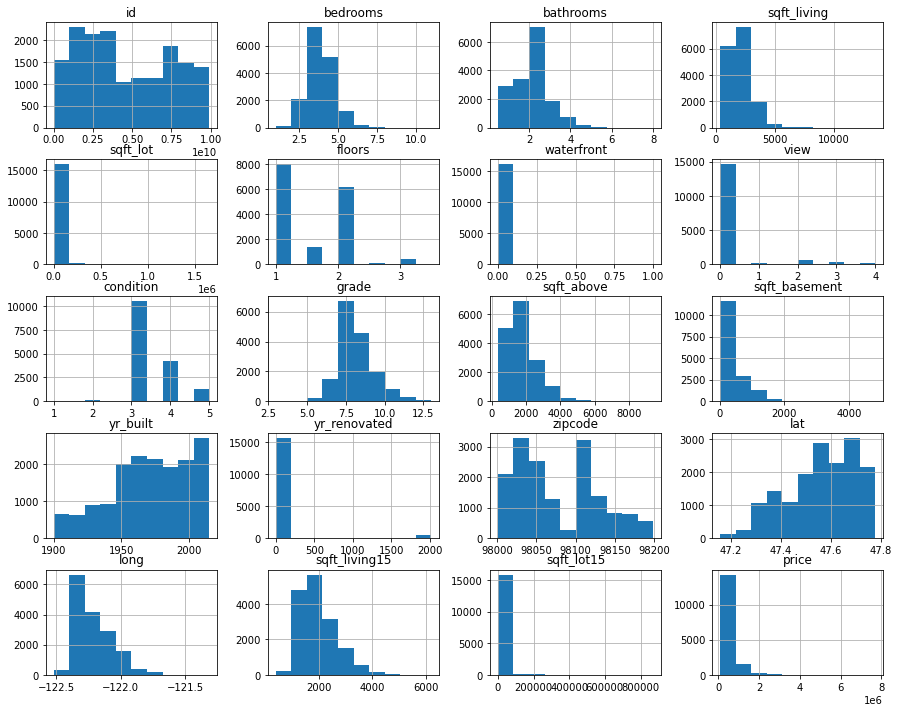

In [27]:
df.hist(figsize = (15,12))
plt.show()

In [28]:
# Define function to remove outliers
def remove_outliers(df):
    '''removes entries with z-score above 3 for specific columns'''
    variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 
                 'lat', 'long', 'sqft_living15', 'sqft_lot15']
    
    for variable in variables:
        df = df[np.abs(X_train[variable]-df[variable].mean()) <= (3*df[variable].std())]
        
    return df

In [29]:
# Apply function to df
df = remove_outliers(df)

In [30]:
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
6405,3905080280,3/4/2015,3,2.50,1880,4499,2.0,0.0,0.0,3,...,1880,0,1993,0.0,98029,47.5664,-121.999,2130,5114,529000.0
937,5466420030,10/7/2014,3,2.50,2020,6564,1.0,0.0,0.0,3,...,1310,710,1994,0.0,98042,47.3545,-122.158,1710,5151,253000.0
15201,4443800545,3/30/2015,2,2.00,1430,3880,1.0,0.0,0.0,4,...,1430,0,1949,0.0,98117,47.6844,-122.392,1430,3880,545000.0
13083,9485930120,10/14/2014,3,2.25,2270,32112,1.0,0.0,0.0,4,...,1740,530,1980,0.0,98042,47.3451,-122.094,2310,41606,390000.0
16852,7841300285,8/11/2014,1,1.50,1048,4800,1.0,0.0,0.0,3,...,1048,0,1942,0.0,98055,47.4759,-122.212,950,4800,199950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,7853230570,9/15/2014,3,2.50,2230,5800,2.0,0.0,0.0,3,...,2230,0,2004,0.0,98065,47.5308,-121.847,2230,6088,440000.0
21575,4140940150,10/2/2014,4,2.75,2770,3852,2.0,0.0,0.0,3,...,2770,0,2014,0.0,98178,47.5001,-122.232,1810,5641,572000.0
5390,8658300480,7/21/2014,4,1.50,1530,9000,1.0,0.0,0.0,4,...,1530,0,1976,0.0,98014,47.6492,-121.908,1520,8500,299800.0
860,1723049033,6/20/2014,1,0.75,380,15000,1.0,0.0,0.0,3,...,380,0,1963,0.0,98168,47.4810,-122.323,1170,15000,245000.0


In [31]:
df.zipcode = df.zipcode.astype('category')
df = df[np.isfinite(df['waterfront'])]

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 6405 to 15795
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             14999 non-null  int64   
 1   date           14999 non-null  object  
 2   bedrooms       14999 non-null  int64   
 3   bathrooms      14999 non-null  float64 
 4   sqft_living    14999 non-null  int64   
 5   sqft_lot       14999 non-null  int64   
 6   floors         14999 non-null  float64 
 7   waterfront     14999 non-null  float64 
 8   view           14999 non-null  float64 
 9   condition      14999 non-null  int64   
 10  grade          14999 non-null  int64   
 11  sqft_above     14999 non-null  int64   
 12  sqft_basement  14999 non-null  int64   
 13  yr_built       14999 non-null  int64   
 14  yr_renovated   14999 non-null  float64 
 15  zipcode        14999 non-null  category
 16  lat            14999 non-null  float64 
 17  long           14999 non-nul

## Exploring the Data

### Investigate linearity assumption

In [101]:
#understanding the distribution with seaborn
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(df[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']], 
                 hue='bedrooms', palette='tab20',height=6)
g.set(xticklabels=[]);

KeyError: "['sqft_living', 'sqft_lot15'] not in index"

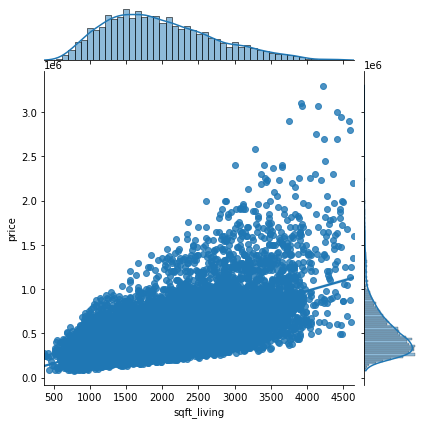

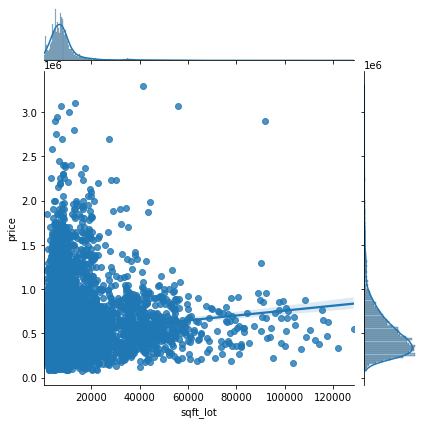

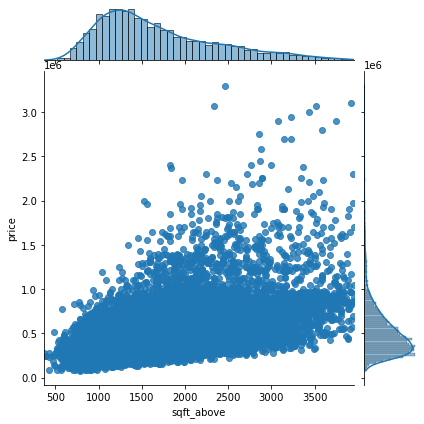

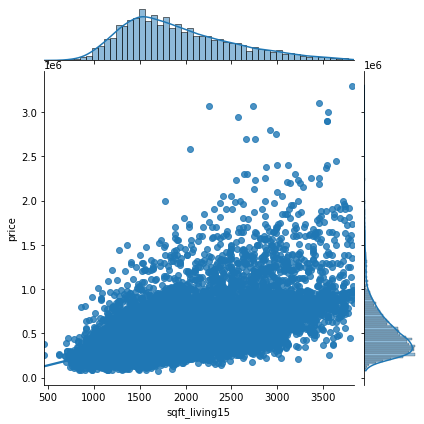

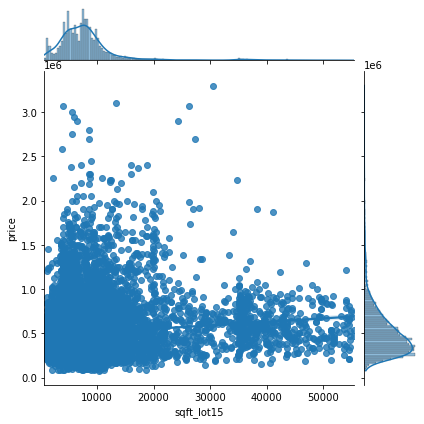

In [34]:
# Define list of continuous variables
cont_feat = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']


#  Plot jointplots
for feature in cont_feat:
    sns.jointplot(x = df[feature], y = df['price'], kind = 'reg')

### Interpret a Correlation Heatmap to Build a Baseline Model

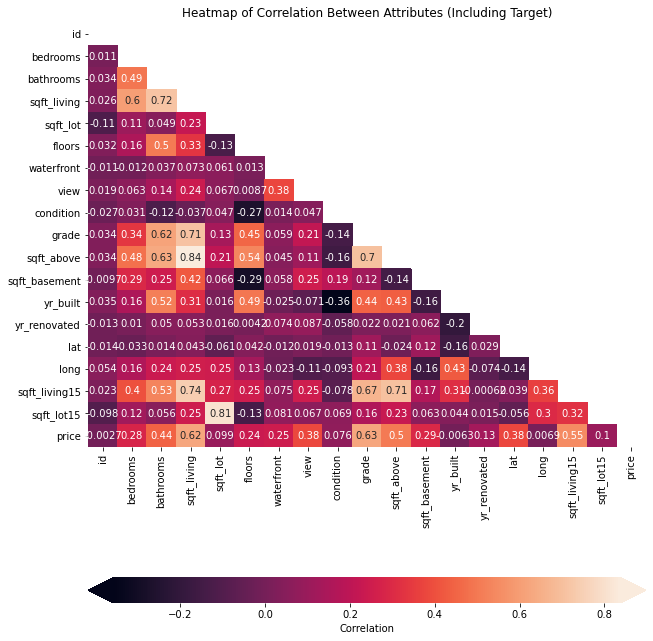

In [35]:
import seaborn as sns
import numpy as np

# Create a df with the target as the first column,
# then compute the correlation matrix
corr = df.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(10, 12))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

In [36]:
df.corr()
abs(df.corr()) >= 0.75
# Show all pairwise correlations above .75

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [37]:
def drop_corrfeats(df):
    '''Drop features which appear correlated'''
    df = df.drop(['id', 'grade', 'sqft_living', 'sqft_lot15', 'yr_renovated'], axis = 1)
    return df

In [38]:

#df.drop(['id', 'grade', 'sqft_living', 'sqft_lot15', 'yr_renovated'], axis=1, inplace=True)
#df.describe()

In [39]:
# Drop multicollinear features
df = drop_corrfeats(df)

In [40]:
df

,date,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,price
6405,3/4/2015,3,2.50,4499,2.0,0.0,0.0,3,1880,0,1993,98029,47.5664,-121.999,2130,529000.0
937,10/7/2014,3,2.50,6564,1.0,0.0,0.0,3,1310,710,1994,98042,47.3545,-122.158,1710,253000.0
15201,3/30/2015,2,2.00,3880,1.0,0.0,0.0,4,1430,0,1949,98117,47.6844,-122.392,1430,545000.0
13083,10/14/2014,3,2.25,32112,1.0,0.0,0.0,4,1740,530,1980,98042,47.3451,-122.094,2310,390000.0
16852,8/11/2014,1,1.50,4800,1.0,0.0,0.0,3,1048,0,1942,98055,47.4759,-122.212,950,199950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,9/15/2014,3,2.50,5800,2.0,0.0,0.0,3,2230,0,2004,98065,47.5308,-121.847,2230,440000.0
21575,10/2/2014,4,2.75,3852,2.0,0.0,0.0,3,2770,0,2014,98178,47.5001,-122.232,1810,572000.0
5390,7/21/2014,4,1.50,9000,1.0,0.0,0.0,4,1530,0,1976,98014,47.6492,-121.908,1520,299800.0
860,6/20/2014,1,0.75,15000,1.0,0.0,0.0,3,380,0,1963,98168,47.4810,-122.323,1170,245000.0


In [41]:
# remove uncessary features

In [42]:
df = df.drop(['date'], axis = 1)

In [43]:
df

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,price
6405,3,2.50,4499,2.0,0.0,0.0,3,1880,0,1993,98029,47.5664,-121.999,2130,529000.0
937,3,2.50,6564,1.0,0.0,0.0,3,1310,710,1994,98042,47.3545,-122.158,1710,253000.0
15201,2,2.00,3880,1.0,0.0,0.0,4,1430,0,1949,98117,47.6844,-122.392,1430,545000.0
13083,3,2.25,32112,1.0,0.0,0.0,4,1740,530,1980,98042,47.3451,-122.094,2310,390000.0
16852,1,1.50,4800,1.0,0.0,0.0,3,1048,0,1942,98055,47.4759,-122.212,950,199950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,3,2.50,5800,2.0,0.0,0.0,3,2230,0,2004,98065,47.5308,-121.847,2230,440000.0
21575,4,2.75,3852,2.0,0.0,0.0,3,2770,0,2014,98178,47.5001,-122.232,1810,572000.0
5390,4,1.50,9000,1.0,0.0,0.0,4,1530,0,1976,98014,47.6492,-121.908,1520,299800.0
860,1,0.75,15000,1.0,0.0,0.0,3,380,0,1963,98168,47.4810,-122.323,1170,245000.0


### Normalize Data

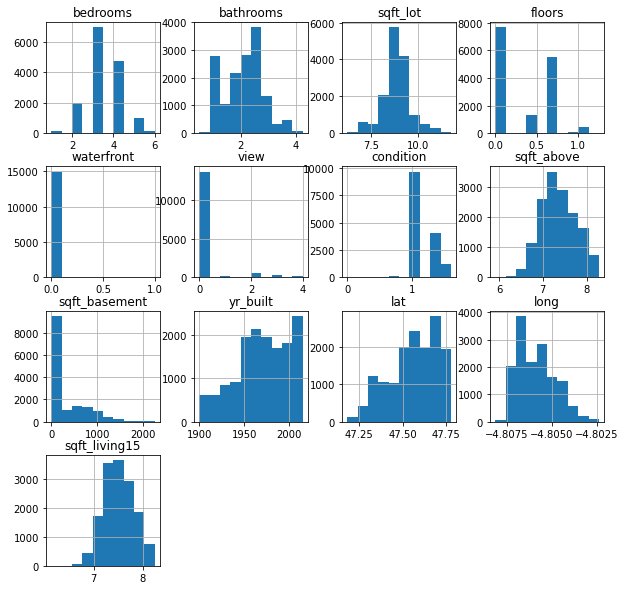

In [44]:

import scipy.stats as stats
# create variables for ind and dep variables and one to keep track of which variables are log transformed
ind_vars = df
dep_var = df['price']
ind_vars.drop(['price'], axis=1, inplace=True)
log_transformed = [] # Keep track of which variables were log transformed

for column in df.select_dtypes(include=['int64', 'float64']):
    # We want to log all columns that show signs of skewness
    if stats.skew(df[column]) >= 0.5 or stats.skew(df[column]) <= -0.5:
        """
        Can't log negative numbers. 
        All of of longitudes are negative, so we have to log the absolute value and then multiply by -1.
        """
        if column == 'long':
            ind_vars[column] = np.log(abs(df[column])) 
            ind_vars[column] = df[column] * -1 # Store in our independent variables df
            log_transformed.append(column)
            continue
        elif not df[column].isin([0]).any():
            ind_vars[column] = np.log(df[column]) # Store in our independent variables df
            log_transformed.append(column)
    else:
        ind_vars[column] = df[column] # add any now skewed columns to ind_vars without log

for column in df.select_dtypes(include=['category', 'object']):
    ind_vars[column] = df[column]

ind_vars.hist(figsize=(10,10))
plt.show()

In [45]:
# store mean and std for all log transformed variables
pre_standardization = []
# Standardize numeric columns
for column in ind_vars.select_dtypes(include=['int64', 'float64']):
    if column != 'price':
        result = [column]
        result.append(ind_vars[column].mean())
        result.append(ind_vars[column].std())
        pre_standardization.append(result)
        ind_vars[column] = (ind_vars[column] - ind_vars[column].mean()) / ind_vars[column].std()
ind_vars.head()
print(pre_standardization)

[['bedrooms', 3.327488499233282, 0.8608080882866167], ['bathrooms', 2.0519034602306823, 0.6963925177315389], ['sqft_lot', 8.870494988632005, 0.7410223484776943], ['floors', 0.3276790330948438, 0.3523026863455262], ['waterfront', 0.005267017801186746, 0.07238525855678843], ['view', 0.20008000533368892, 0.7089694483004482], ['condition', 1.212791230492733, 0.18169853408531664], ['sqft_above', 7.356324012115866, 0.3965033744252677], ['sqft_basement', 281.64264284285616, 416.29255878968024], ['yr_built', 1969.9507967197812, 29.43678281373399], ['lat', 47.56233939595977, 0.13883443215332192], ['long', -4.805877676176988, 0.0010415689063904515], ['sqft_living15', 7.513653875110228, 0.306651336179155]]


In [46]:
ind_vars

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15
6405,-0.380443,0.643454,-0.619259,1.037370,-0.072764,-0.282212,-0.628398,0.460786,-0.676550,0.783007,98029,0.029248,1.790403,0.489883
937,-0.380443,0.643454,-0.109497,-0.930107,-0.072764,-0.282212,-0.628398,-0.450290,1.028982,0.816978,98042,-1.497031,0.539943,-0.226333
15201,-1.542142,-0.074532,-0.819010,-0.930107,-0.072764,-0.282212,0.954896,-0.229240,-0.676550,-0.711722,98117,0.879181,-1.297401,-0.809467
13083,-0.380443,0.284461,2.032989,-0.930107,-0.072764,-0.282212,0.954896,0.265613,0.596593,0.341383,98042,-1.564737,1.043077,0.754436
16852,-2.703841,-0.792518,-0.531865,-0.930107,-0.072764,-0.282212,-0.628398,-1.013069,-0.676550,-0.949519,98055,-0.622608,0.115628,-2.143124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,-0.380443,0.643454,-0.276485,1.037370,-0.072764,-0.282212,-0.628398,0.891374,-0.676550,1.156689,98065,-0.227173,2.987337,0.639498
21575,0.781256,1.002447,-0.828784,1.037370,-0.072764,-0.282212,-0.628398,1.438269,-0.676550,1.496400,98178,-0.448299,-0.041478,-0.040997
5390,0.781256,-0.792518,0.316434,-0.930107,-0.072764,-0.282212,0.954896,-0.058766,-0.676550,0.205498,98014,0.625642,2.506809,-0.610427
860,-2.703841,-1.869497,1.005787,-0.930107,-0.072764,-0.282212,-0.628398,-3.571603,-0.676550,-0.236126,98168,-0.585873,-0.755985,-1.463861


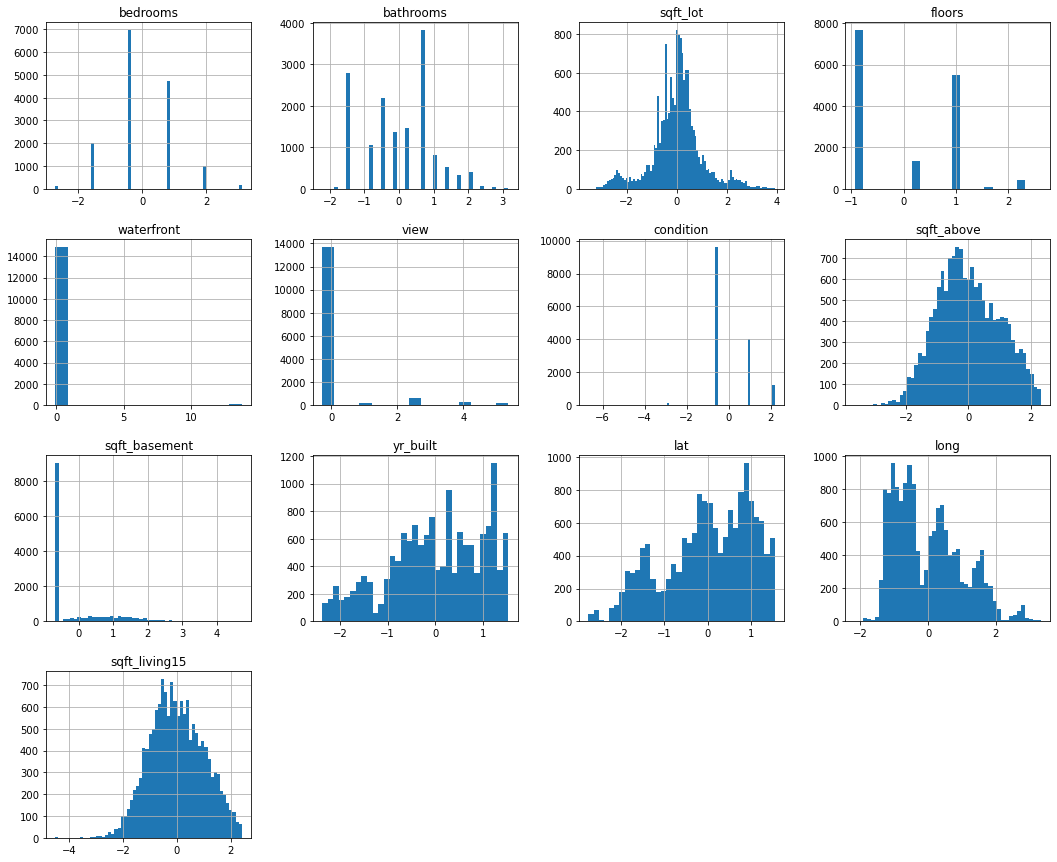

In [47]:
ind_vars.hist(figsize=(18,15), bins='auto');

In [48]:
# Save a csv copy
df.to_csv('house_date_cleaned.csv')

One hot encoding zipcode

In [49]:
zips = pd.get_dummies(ind_vars.zipcode)
ind_vars = df.join(zips)
ind_vars.drop(['zipcode'], axis=1, inplace=True)
#ind_vars.info()

In [50]:
zips

,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
6405,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
937,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13083,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21575,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [51]:
ind_vars

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
6405,-0.380443,0.643454,-0.619259,1.037370,-0.072764,-0.282212,-0.628398,0.460786,-0.676550,0.783007,...,0,0,0,0,0,0,0,0,0,0
937,-0.380443,0.643454,-0.109497,-0.930107,-0.072764,-0.282212,-0.628398,-0.450290,1.028982,0.816978,...,0,0,0,0,0,0,0,0,0,0
15201,-1.542142,-0.074532,-0.819010,-0.930107,-0.072764,-0.282212,0.954896,-0.229240,-0.676550,-0.711722,...,0,0,0,0,0,0,0,0,0,0
13083,-0.380443,0.284461,2.032989,-0.930107,-0.072764,-0.282212,0.954896,0.265613,0.596593,0.341383,...,0,0,0,0,0,0,0,0,0,0
16852,-2.703841,-0.792518,-0.531865,-0.930107,-0.072764,-0.282212,-0.628398,-1.013069,-0.676550,-0.949519,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,-0.380443,0.643454,-0.276485,1.037370,-0.072764,-0.282212,-0.628398,0.891374,-0.676550,1.156689,...,0,0,0,0,0,0,0,0,0,0
21575,0.781256,1.002447,-0.828784,1.037370,-0.072764,-0.282212,-0.628398,1.438269,-0.676550,1.496400,...,0,0,0,0,0,0,1,0,0,0
5390,0.781256,-0.792518,0.316434,-0.930107,-0.072764,-0.282212,0.954896,-0.058766,-0.676550,0.205498,...,0,0,0,0,0,0,0,0,0,0
860,-2.703841,-1.869497,1.005787,-0.930107,-0.072764,-0.282212,-0.628398,-3.571603,-0.676550,-0.236126,...,0,0,0,0,1,0,0,0,0,0


## Baseline Model

Building a baseline model

In [52]:
ind_vars.view = ind_vars.view.astype('uint8')
X = ind_vars
y = dep_var
y_log = np.log(y)
X = sm.add_constant(X)

# fit a linear model for our data
model_1 = sm.OLS(y, X).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     665.4
Date:                Wed, 15 Sep 2021   Prob (F-statistic):               0.00
Time:                        08:02:23   Log-Likelihood:            -1.9800e+05
No. Observations:               14999   AIC:                         3.962e+05
Df Residuals:                   14916   BIC:                         3.968e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.935e+05   1967.971    250.777      0.000     4.9e+05    4.97e+05
bedrooms      -1.609e+04   1430.796    -11.246      0.000   -1.89e+04   -1.33e+04
bathrooms      1.977e+04   1887.637     10.473      0.000    1.61e+04    2.35e+04
sqft_lot       2.843e+04   1733.784     16.398      0.000     2.5e+04    3.18e+04
floors        -1727.8520   1840.452     -0.939      0.348   -5335.365    1879.661
waterfront     4.137e+04   1202.468     34.402      0.000     3.9e+04    4.37e+04
view           5.901e+04   1670.769     35.321      0.000    5.57e+04    6.23e+04
condition      1.497e+04   1201.313     12.460      0.000    1.26e+04    1.73e+04
sqft_above     1.155e+05   2297.493     50.252      0.000    1.11e+05     1.2e+05
sqft_basement  4.123e+04   1551.503     26.574      0.000    3.82e+04    4.43e+04
yr_built        -51.8340   1747.772     -0.030      0.976   -3477.683    3374.015
lat            1.773e+04   9083.241      1.951      0.051     -78.574    3.55e+04
long           -2.17e+04   7960.514     -2.725      0.006   -3.73e+04   -6091.440
sqft_living15  2.537e+04   1777.642     14.273      0.000    2.19e+04    2.89e+04
98001         -2.006e+05   1.88e+04    -10.651      0.000   -2.38e+05   -1.64e+05
98002         -1.605e+05   1.95e+04     -8.252      0.000   -1.99e+05   -1.22e+05
98003         -1.916e+05   1.98e+04     -9.667      0.000    -2.3e+05   -1.53e+05
98004           4.63e+05   1.05e+04     44.177      0.000    4.42e+05    4.83e+05
98005          1.255e+05   1.34e+04      9.334      0.000    9.91e+04    1.52e+05
98006          9.412e+04   8782.440     10.717      0.000    7.69e+04    1.11e+05
98007          7.621e+04   1.44e+04      5.279      0.000    4.79e+04    1.05e+05
98008          6.263e+04   1.19e+04      5.266      0.000    3.93e+04    8.59e+04
98010         -7.712e+04   2.43e+04     -3.168      0.002   -1.25e+05   -2.94e+04
98011          -9.44e+04   1.73e+04     -5.466      0.000   -1.28e+05   -6.06e+04
98014         -6.112e+04   2.76e+04     -2.219      0.027   -1.15e+05   -7120.781
98019         -1.253e+05   2.41e+04     -5.197      0.000   -1.73e+05    -7.8e+04
98022         -1.396e+05   2.75e+04     -5.082      0.000   -1.93e+05   -8.58e+04
98023         -2.151e+05   2.09e+04    -10.290      0.000   -2.56e+05   -1.74e+05
98024         -2.692e+04   3.03e+04     -0.887      0.375   -8.64e+04    3.25e+04
98027          2.869e+04   1.32e+04      2.181      0.029    2906.417    5.45e+04
98028          -1.16e+05   1.59e+04     -7.276      0.000   -1.47e+05   -8.48e+04
98029           7.29e+04   1.57e+04      4.642      0.000    4.21e+04    1.04e+05
98030          -1.84e+05   1.55e+04    -11.834      0.000   -2.14e+05   -1.54e+05
98031         -1.809e+05   1.34e+04    -13.492      0.000   -2.07e+05   -1.55e+05
98032         -1.903e+05   1.91e+04     -9.962   

Looking at the F-test, testing the null hypothesis that nothing is going on here (in other words, that all of the coefficients on your independent variables are equal to zero). We reject this null hypothesis with extremely high confidence - 100% in fact.
"""

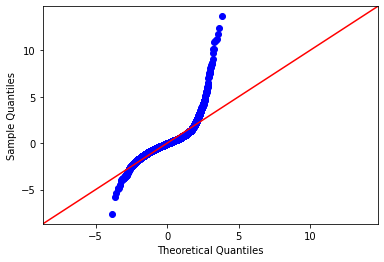

In [54]:
fig = sm.graphics.qqplot(model_1.resid, dist=stats.norm, line='45', fit=True)

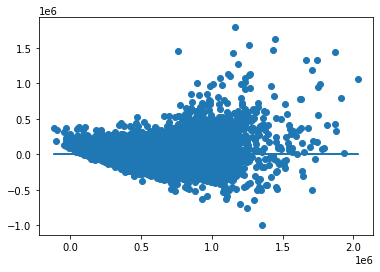

In [55]:
plt.scatter(model_1.predict(X), model_1.resid)
plt.plot(model_1.predict(X), [0 for i in range(len(X))])

## Model 2

At this point, we'll also drop any continuous variables that have a r-sq < 0.01 because those variables add so little that they are negligible and are over complicating our model. Finally, we'll drop one column of each categorical variable. This will help us avoid redundancy.

In [56]:
data = X.join(y_log)
for var in ind_vars.select_dtypes(include=['int64', 'float64']):
    formula = 'price~' + str(var)
    print(formula)
    model = smf.ols(formula=formula, data=data)
    reg = model.fit()
    print('r-sq: ', reg.rsquared)
    # Drop variables with r-squared < 0.01
    if reg.rsquared < 0.01:
        X.drop(var, axis=1, inplace=True)
        print('dropped')
    print('-------------------------')

X.drop(X.columns[len(X.columns)-1], axis=1, inplace=True)

price~bedrooms
r-sq:  0.0944780083294472
-------------------------
price~bathrooms
r-sq:  0.229527082689988
-------------------------
price~sqft_lot
r-sq:  0.0036182120498409187
dropped
-------------------------
price~floors
r-sq:  0.08483632186333523
-------------------------
price~waterfront
r-sq:  0.023864434793935407
-------------------------
price~condition
r-sq:  0.004962724270466845
dropped
-------------------------
price~sqft_above
r-sq:  0.26694258012764305
-------------------------
price~sqft_basement
r-sq:  0.08535694260897664
-------------------------
price~yr_built
r-sq:  0.0006372983114115716
dropped
-------------------------
price~lat
r-sq:  0.23765529935859908
-------------------------
price~long
r-sq:  0.0014093791267122402
dropped
-------------------------
price~sqft_living15
r-sq:  0.31702823183763884
-------------------------


In [57]:
# refit model
model_test = sm.OLS(y_log, X).fit()
model_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     1090.
Date:                Wed, 15 Sep 2021   Prob (F-statistic):               0.00
Time:                        08:02:23   Log-Likelihood:                 3659.4
No. Observations:               14999   AIC:                            -7161.
Df Residuals:                   14920   BIC:                            -6559.
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            13.3810      0.015    904.604      0.000      13.352      13.410
bedrooms         -0.0146      0.002     -7.091      0.000      -0.019      -0.011
bathrooms         0.0281      0.003     11.043      0.000       0.023       0.033
floors           -0.0276      0.002    -11.565      0.000      -0.032      -0.023
waterfront        0.0372      0.002     21.350      0.000       0.034       0.041
view              0.0667      0.002     27.625      0.000       0.062       0.071
sqft_above        0.2157      0.003     68.140      0.000       0.209       0.222
sqft_basement     0.0754      0.002     33.826      0.000       0.071       0.080
lat               0.0568      0.013      4.359      0.000       0.031       0.082
sqft_living15     0.0757      0.003     29.765      0.000       0.071       0.081
98001            -0.7833      0.036    -21.610      0.000      -0.854      -0.712
98002            -0.7998      0.038    -21.165      0.000      -0.874      -0.726
98003            -0.7426      0.036    -20.495      0.000      -0.814      -0.672
98004             0.2182      0.019     11.522      0.000       0.181       0.255
98005            -0.1232      0.022     -5.477      0.000      -0.167      -0.079
98006            -0.1913      0.019    -10.302      0.000      -0.228      -0.155
98007            -0.2067      0.023     -8.985      0.000      -0.252      -0.162
98008            -0.2443      0.018    -13.282      0.000      -0.280      -0.208
98010            -0.5399      0.040    -13.414      0.000      -0.619      -0.461
98011            -0.5231      0.023    -23.148      0.000      -0.567      -0.479
98014            -0.5455      0.029    -19.097      0.000      -0.601      -0.490
98019            -0.6730      0.023    -28.882      0.000      -0.719      -0.627
98022            -0.7047      0.047    -15.142      0.000      -0.796      -0.613
98023            -0.7912      0.036    -22.164      0.000      -0.861      -0.721
98024            -0.4425      0.037    -11.824      0.000      -0.516      -0.369
98027            -0.3139      0.021    -15.132      0.000      -0.355      -0.273
98028            -0.5576      0.021    -27.063      0.000      -0.598      -0.517
98029            -0.2601      0.020    -13.302      0.000      -0.298      -0.222
98030            -0.7643      0.032    -23.603      0.000      -0.828      -0.701
98031            -0.7445      0.029    -25.379      0.000      -0.802      -0.687
98032            -0.8047      0.035    -22.886      0.000      -0.874      -0.736
98033            -0.1228      0.017     -7.251      0.000      -0.156      -0.090
98034            -0.4054      0.017    -23.841      0.000      -0.439      -0.372
98038            -0.6777      0.031    -21.863      0.000      -0.738      -0.617
98039             0.4269      0.045      9.392   

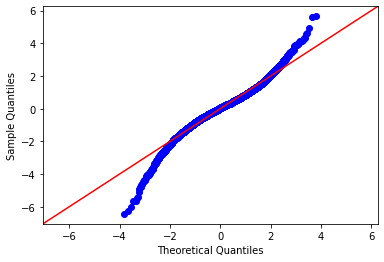

In [58]:
fig = sm.graphics.qqplot(model_test.resid, dist=stats.norm, line='45', fit=True)

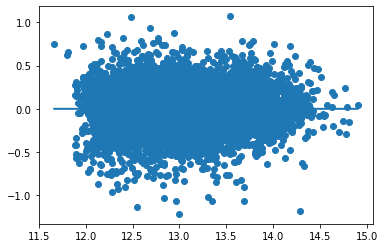

In [59]:
plt.scatter(model_test.predict(X), model_test.resid)
plt.plot(model_test.predict(X), [0 for i in range(len(X))])

## Model 3


Let's use stepwise selection to ensure we only have statistically significant results, dropping features which have a p-value greater than 0.05.

In [60]:
from sklearn.model_selection import KFold

In [61]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score

In [62]:
def exp_interactions(X,y,n=5):
    # Takes dataframe of predictors and the series containing targets.
    # Returns a list of tuples containing the top_n interaction pairs plus their R2 scores.

    # Instantiate our model
    regression = LinearRegression()

    # Get the baseline 'r2' score
    crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
    baseline = np.mean(cross_val_score(regression, X, y, scoring='r2', cv=crossvalidation))

    # Create list to hold interaction tuples
    interactions = []

    # Create a list of all 2 feature combinations
    feat_combinations = it.combinations(X.columns, 2)

    data = X.copy()
    # Iterate over the list of feature pairs, creating the interaction term and adding it to the model.
    # Only one interaction term is used each time so that we can compare 'r2' impact.
    for i, (a, b) in enumerate(feat_combinations):
        data['interaction'] = data[a] * data[b]
        score = np.mean(cross_val_score(regression, data, y, scoring='r2', cv=crossvalidation))
        if score > baseline:
            interactions.append((a, b, round(score,3)))

        if i % 500 == 0:
            print(' '*12,end='\r')
            print(i,end='\r')

    # Capture the top_n scores in a list.
    top_n_int = sorted(interactions, key=lambda inter: inter[2], reverse=True)[:n]
    #print(f'Top {n} interactions: \n{top_n_int}')
    return top_n_int


In [63]:
top_5_interactions = exp_interactions(X,y_log)

top_5_interactions

[('floors', 'sqft_above', 0.852),
 ('lat', 98118, 0.851),
 ('bedrooms', 'floors', 0.85),
 ('bathrooms', 'sqft_above', 0.85),
 ('floors', 'sqft_living15', 0.85)]

In [104]:
import pickle

with open('top_5_interactions.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(top_5_interactions, f, pickle.HIGHEST_PROTOCOL)

In [108]:
with open('top_5_interactions.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    top_5_interactions_model = pickle.load(f)

In [109]:
top_5_interactions_model

[('floors', 'sqft_above', 0.852),
 ('lat', 98118, 0.851),
 ('bedrooms', 'floors', 0.85),
 ('bathrooms', 'sqft_above', 0.85),
 ('floors', 'sqft_living15', 0.85)]

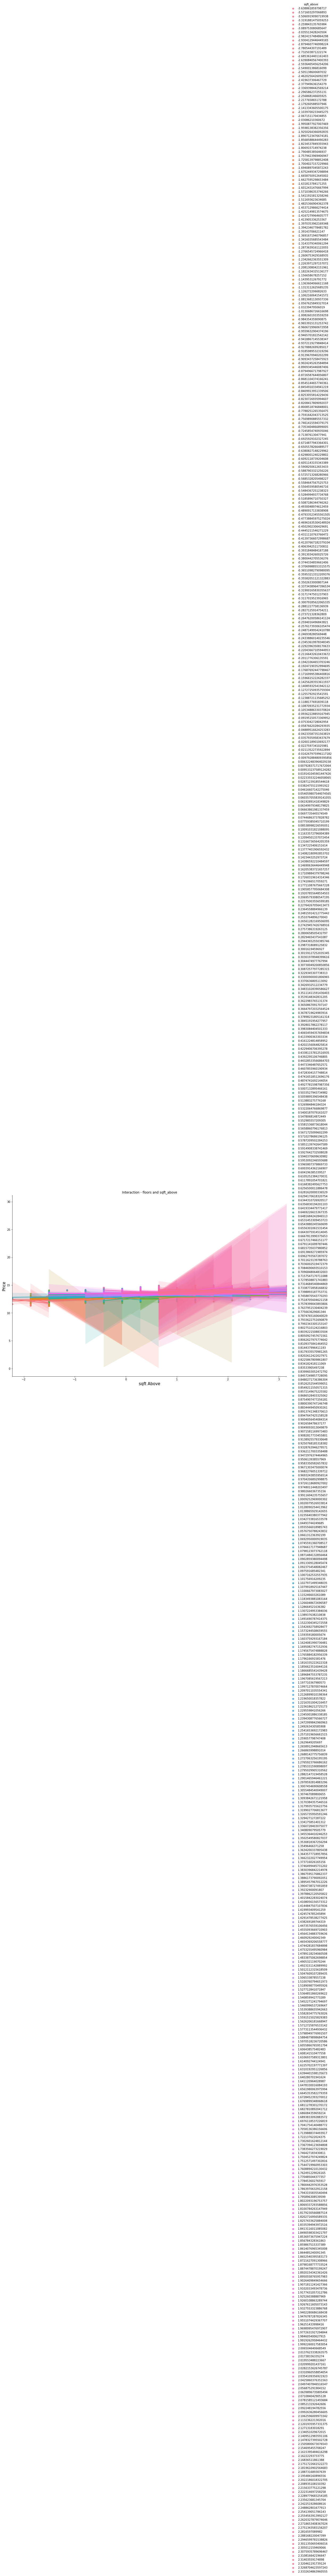

In [68]:
temp_df = pd.concat([y_log,X],axis=1)
lm = sns.lmplot(y='price', x='bathrooms', hue='sqft_above', data=temp_df, height=10, aspect=1.5)
ax = plt.gca()
ax.set_title('Interaction - floors and sqft_above')
ax.set_xlabel('sqft Above', fontsize=15)
ax.set_ylabel('Price', fontsize=15)
ax = lm.axes

In [69]:
def add_interactions(df, interactions):
    '''
    Takes the training set and a list of interaction tuples to create a dataframe of interactions.
    Returns the training set concatenated with the interactions
    '''
    # Create the interactions
    interact_df = pd.DataFrame()
    for inter in interactions:
        interact_df[f'{inter[0]}:{inter[1]}'] = df[inter[0]] * df[inter[1]]

    # Concatenate with the training set
    df.reset_index(drop=True, inplace=True)
    interact_df.reset_index(drop=True, inplace=True)
    df = pd.concat([df, interact_df],axis=1)

    return df

In [90]:
def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.01,
                       threshold_out = 0.05,
                       verbose=False):
    """ Perform a forward-backward feature selection
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """

    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print(f'Add {best_feature} with p-value {best_pval}')

        # backward step
        regressor_OLS  = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            retain = np.ones(X.shape[1], bool)
            drop = np.argmax(regressor_OLS.pvalues)
            # Drop the highest pvalue(s)
            retain[drop] = False
            if verbose:
                print(f'Drop {worst_feature} with p-value {worst_pval}')
        if not changed:
            break
    return included


In [110]:
# Create the interactions and model
X_interactions = add_interactions(X,top_5_interactions_model)

# Do step-wise feature selection
results_steps = stepwise_selection(X_interactions, list(y_log))

X_train_stepped_down_2 = X_interactions.copy()

# Create a list of features in our training set that are not in the step-wise selection results so that we can drop them.
to_drop = [c for c in X_train_stepped_down_2.columns if c not in results_steps]

# Drop the features
X_train_stepped_down_2.drop(to_drop, axis=1, inplace=True)


model = sm.OLS(list(y_log), sm.add_constant(pd.DataFrame(X_train_stepped_down_2))).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     1156.
Date:                Wed, 15 Sep 2021   Prob (F-statistic):               0.00
Time:                        10:17:30   Log-Likelihood:                 3950.1
No. Observations:               14999   AIC:                            -7744.
Df Residuals:                   14921   BIC:                            -7150.
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                13.3437      0.012   1152.309      0.000      13.321      13.366
bedrooms             -0.0155      0.002     -7.698      0.000      -0.019      -0.012
bathrooms             0.0305      0.002     12.236      0.000       0.026       0.035
floors               -0.0283      0.002    -12.144      0.000      -0.033      -0.024
waterfront            0.0368      0.002     21.566      0.000       0.033       0.040
view                  0.0683      0.002     28.850      0.000       0.064       0.073
sqft_above            0.2137      0.003     68.835      0.000       0.208       0.220
sqft_basement         0.0783      0.002     35.620      0.000       0.074       0.083
lat                   0.0138      0.013      1.106      0.269      -0.011       0.038
sqft_living15         0.0705      0.003     28.029      0.000       0.066       0.075
98001                -0.8439      0.036    -23.723      0.000      -0.914      -0.774
98002                -0.8593      0.037    -23.183      0.000      -0.932      -0.787
98003                -0.7977      0.036    -22.440      0.000      -0.867      -0.728
98004                 0.2609      0.016     16.507      0.000       0.230       0.292
98005                -0.0719      0.020     -3.613      0.000      -0.111      -0.033
98006                -0.1741      0.016    -10.813      0.000      -0.206      -0.143
98007                -0.1722      0.020     -8.490      0.000      -0.212      -0.132
98008                -0.2023      0.015    -13.375      0.000      -0.232      -0.173
98010                -0.5962      0.039    -15.120      0.000      -0.673      -0.519
98011                -0.4455      0.018    -24.748      0.000      -0.481      -0.410
98014                -0.4970      0.026    -19.366      0.000      -0.547      -0.447
98019                -0.6051      0.019    -31.760      0.000      -0.642      -0.568
98022                -0.7947      0.046    -17.324      0.000      -0.885      -0.705
98023                -0.8533      0.035    -24.348      0.000      -0.922      -0.785
98024                -0.4233      0.036    -11.873      0.000      -0.493      -0.353
98027                -0.3040      0.019    -16.211      0.000      -0.341      -0.267
98028                -0.4775      0.016    -30.791      0.000      -0.508      -0.447
98029                -0.2421      0.017    -14.198      0.000      -0.276      -0.209
98030                -0.8049      0.032    -25.505      0.000      -0.867      -0.743
98031                -0.7761      0.028    -27.347      0.000      -0.832      -0.720
98032                -0.8446      0.034    -24.641      0.000      -0.912      -0.777
98033                -0.0724      0.012     -5.972      0.000      -0.096      -0.049
98034                -0.3368      0.011    -29.781      0.000      -0.359

Adj. R-squared describes the quality that your model’s R-squared value will never go down with additional variables, only equal or higher. Therefore, this model could look more accurate with multiple variables even if they are poorly contributing. The adjusted R-squared penalizes the R-squared formula based on the number of variables, therefore a lower adjusted score may be telling you some variables are not contributing to your model’s R-squared properly. This is not the case here, as they are equal.

P>|t| is one of the most important statistics in the summary. It uses the t statistic to produce the p value, a measurement of how likely your coefficient is measured through our model by chance. The p value of 0.269 for lat is saying there is a 26.9% chance the Latitude variable has no affect on the dependent variable, home Price, and our results are produced by chance.

If the coefficient is negative, they have an inverse relationship. As one rises, the other falls.

Omnibus describes the normalcy of the distribution of our residuals using skew and kurtosis as measurements. A 0 would indicate perfect normalcy. Prob(Omnibus) is a statistical test measuring the probability the residuals are normally distributed. A 1 would indicate perfectly normal distribution. Skew is a measurement of symmetry in our data, with 0 being perfect symmetry. Kurtosis measures the peakiness of our data, or its concentration around 0 in a normal curve. Higher kurtosis implies fewer outliers.

### Checking Normality

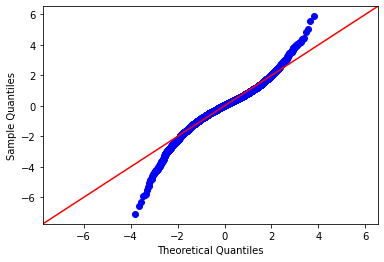

In [94]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

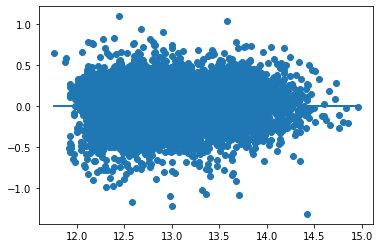

In [97]:
plt.scatter(model.predict(X_train_stepped_down_2), model.resid)
plt.plot(model.predict(X_train_stepped_down_2), [0 for i in range(len(X_train_stepped_down_2))])

## Making Predictions

### Preprocess Test Data

In [ ]:
X_test = X_test.drop(['id', 'date'], axis = 1)

In [ ]:
X_test.waterfront.fillna(0,inplace=True)
X_test.yr_renovated.fillna(0,inplace=True)
X_test.view.fillna(0,inplace=True)

difference = (X_test.loc[X_test["sqft_basement"] == '?', ["sqft_living"]
                   ]).values-(X_test.loc[X_test["sqft_basement"] == '?', ["sqft_above"]]).values
X_test.loc[X_test["sqft_basement"] == '?', ["sqft_basement"]] = difference

X_test.sqft_basement = X_test.sqft_basement.astype(float)
X_test.sqft_basement = X_test.sqft_basement.astype('int64')

In [ ]:
X_test = drop_corrfeats(X_test)


In [ ]:
X_test

In [ ]:
def norm_feat(series):
    return (series - series.mean())/series.std()
for feat in ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
            'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built',
            'yr_renovated' ]:
    X_test[feat] = norm_feat(X_test[feat])
X_test.describe()

In [ ]:
X_test = one_hot_encode(X_test, 'zipcode')

# Drop coord, lat, long, zipcode columns
X_test = X_test.drop(['lat', 'long'], axis = 1)


In [ ]:
# Load model from Pickle
model_4, X_train, y_train = pickle.load(open("model_4.pkl", 'rb'))
